In [83]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings
import shap
import os

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import xgboost as xgb

from pdpbox import pdp, info_plots
from pdpbox import pdp, info_plots

sns.set()

In [1]:
import pandas as pd
import numpy as np
import numpy as np
import pandas as pd
from datetime import datetime
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt 
import plotly.express as px
import plotly.graph_objects as go
import warnings
import shap

from datetime import datetime

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import roc_curve, auc
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, f1_score, roc_curve, auc

import xgboost as xgb

from pdpbox import pdp, info_plots
from pdpbox import pdp, info_plots

sns.set()

In [2]:
df1=pd.read_csv('bus-stops-example.csv')
df2=pd.read_csv('Borough AvPTAI2015.csv') #accessibility level, Public Transport Accessibility Levels (PTALs)
df3=pd.read_csv('LUTrainLoadingData.csv')
df5=pd.read_csv('StationNodesDescription.csv')
df6=pd.read_csv('StationPassengerLinkFlows.csv')

df7=pd.read_csv('stop-sequences-example.csv') #bus
df8=pd.read_csv('tfl-journeys-type.csv')


In [3]:
df1

,Stop_Code_LBSL,Bus_Stop_Code,Naptan_Atco,Stop_Name,Location_Easting,Location_Northing,Heading,Stop_Area,Virtual_Bus_Stop
0,10001,72689,490013793E,TREVOR CLOSE,515781,174783,78,NB16,0
1,10002,48461,490000108F,HIGHBURY CORNER,531614,184603,5,C902,0
2,10003,77150,490000108B,HIGHBURY & ISLINGTON STATION <> #,531573,184786,127,C903,0
3,10004,48037,490012451S,ST MARY MAGDALENE CHURCH,531403,184942,136,C904,0
4,10005,57538,490012451N,ST MARY MAGDALENE CHURCH,531328,185009,322,C904,0
...,...,...,...,...,...,...,...,...,...
194,10880,53256,490010736G,PALMERS GREEN / THE TRIANGLE,530996,192606,6,U605,0
195,10881,47221,490009248C,LODGE DRIVE,531110,192821,26,U606,0
196,10883,75172,490006974A,FOX LANE,531172,192966,19,U607,0
197,10885,71425,490006974Z,FOX LANE,531220,193067,199,U607,0


In [52]:
df1.to_csv('bus.csv')

In [4]:
df1.isna().sum()

Stop_Code_LBSL       0
Bus_Stop_Code        0
Naptan_Atco          0
Stop_Name            0
Location_Easting     0
Location_Northing    0
Heading              0
Stop_Area            0
Virtual_Bus_Stop     0
dtype: int64

In [102]:
val=['Stop_Code_LBSL','Bus_Stop_Code','Naptan_Atco','Location_Easting','Location_Northing','Stop_Area']

In [103]:
def preprocess(dataset):
    X = pd.DataFrame()
    X = dataset[val]

    Y = dataset['Heading']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['Stop_Name'] = label_encoder.fit_transform(dataset['Stop_Name'])
    X['Stop_Area'] = label_encoder.fit_transform(dataset['Stop_Area'])
    X['Naptan_Atco'] = label_encoder.fit_transform(dataset['Naptan_Atco'])

    return X, Y

In [104]:
processed_dataset = preprocess(df1)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

Text(0.5, 1.0, 'Correlation Heatmap')

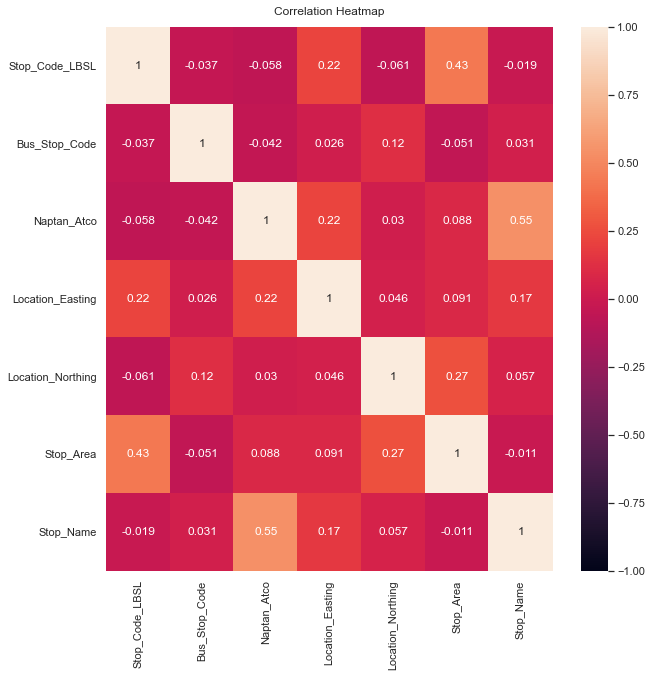

In [105]:
plt.figure(figsize=(10,10))
heatmap = sns.heatmap(X_train.corr(), vmin=-1, vmax=1, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)


In [106]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 10
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

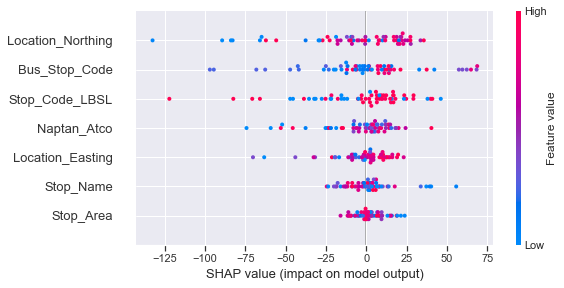

In [107]:
shap.summary_plot(shap_values, X_test)

In [14]:
df2

,Borough Code,Borough Name,AvPTAI2015,PTAL
0,E09000021,Kingston upon Thames,5.425275,2
1,E09000008,Croydon,6.757744,2
2,E09000006,Bromley,3.592084,1b
3,E09000018,Hounslow,5.842208,2
4,E09000009,Ealing,8.503510,2
5,E09000016,Havering,2.747859,1b
6,E09000017,Hillingdon,3.561241,1b
7,E09000015,Harrow,5.822306,2
8,E09000005,Brent,9.223249,2
9,E09000003,Barnet,5.542330,2


In [15]:
df3

,From_Station,To_Station,Line,Line_Direction,Platform_Direction,NAPTAN_From,NAPTAN_To,Direction,0500-0515,0515-0530,...,2330-2345,2345-0000,0000-0015,0015-0030,0030-0045,0045-0100,0100-0115,0115-0130,0130-0145,0145-0200
0,Harrow & Wealdstone,Kenton,Bakerloo,SB,SB,940GZZLUHAW,940GZZLUKEN,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
1,Kenton,South Kenton,Bakerloo,SB,SB,940GZZLUKEN,940GZZLUSKT,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
2,South Kenton,North Wembley,Bakerloo,SB,SB,940GZZLUSKT,940GZZLUNWY,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
3,North Wembley,Wembley Central,Bakerloo,SB,SB,940GZZLUNWY,940GZZLUWYC,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
4,Wembley Central,Stonebridge Park,Bakerloo,SB,SB,940GZZLUWYC,940GZZLUSGP,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
743,Ladbroke Grove,Latimer Road,Circle,WB,WB,940GZZLULAD,940GZZLULRD,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
744,Latimer Road,Wood Lane,Circle,WB,WB,940GZZLULRD,940GZZLUWLA,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
745,Wood Lane,Shepherd's Bush Market,Circle,WB,WB,940GZZLUWLA,940GZZLUSBM,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN
746,Shepherd's Bush Market,Goldhawk Road,Circle,WB,WB,940GZZLUSBM,940GZZLUGHK,Inbound,NaN,NaN,...,1.0,1.0,1.0,1.0,1.0,1.0,1.0,NaN,NaN,NaN


In [25]:
df3.isna().sum()

From_Station            0
To_Station              0
Line                    0
Line_Direction          0
Platform_Direction      1
                     ... 
0045-0100             271
0100-0115             460
0115-0130             633
0130-0145             730
0145-0200             748
Length: 92, dtype: int64

In [17]:
df5

,Node,Station,Node_Type,Line_Direction,Platform_Direction,Line,Platform_Type,Destination,Station_Entrance_Exit,NLC,NAPTAN,Deprecated,Year_of_addition
0,8323,Acton Town,Platform,EB,EB,District,LU Mult Lines,NaN,NaN,500,940GZZLUACT,False,NaN
1,8324,Acton Town,Platform,WB,WB,District,LU Mult Lines,NaN,NaN,500,940GZZLUACT,False,NaN
2,8318,Acton Town,Exit,NaN,NaN,NaN,NaN,NaN,NaN,500,940GZZLUACT,False,NaN
3,8316,Acton Town,Entrance,NaN,NaN,NaN,NaN,NaN,NaN,500,940GZZLUACT,False,NaN
4,8321,Acton Town,Platform,EB,EB,Piccadilly,LU Mult Lines,NaN,NaN,500,940GZZLUACT,False,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,7722,Woodside Park,Exit,NaN,NaN,NaN,NaN,NaN,NaN,771,940GZZLUWOP,False,NaN
1456,7723,Woodside Park,Platform,NB,NB,Northern,LU 1 Line,NaN,NaN,771,940GZZLUWOP,False,NaN
1457,7720,Woodside Park,Entrance,NaN,NaN,NaN,NaN,NaN,NB Platform Entrance,771,940GZZLUWOP,False,NaN
1458,7724,Woodside Park,Platform,SB,SB,Northern,LU 1 Line,NaN,NaN,771,940GZZLUWOP,False,NaN


In [26]:
df5.isna().sum()

Node                        0
Station                     0
Node_Type                   0
Line_Direction            591
Platform_Direction        591
Line                      591
Platform_Type             591
Destination              1411
Station_Entrance_Exit    1360
NLC                         0
NAPTAN                      0
Deprecated                  0
Year_of_addition         1460
dtype: int64

In [18]:
df6

,Start_Node,End_Node,Station,NLC,NAPTAN,0500-0515,0515-0530,0530-0545,0545-0600,0600-0615,...,2330-2345,2345-0000,0000-0015,0015-0030,0030-0045,0045-0100,0100-0115,0115-0130,0130-0145,0145-0200
0,8316,8321,Acton Town,500,940GZZLUACT,16,19,26,38,50,...,6,6,4,3,2,1,0,0,0,0
1,8316,8324,Acton Town,500,940GZZLUACT,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,8316,8323,Acton Town,500,940GZZLUACT,4,5,6,9,12,...,3,3,2,1,1,0,0,0,0,0
3,8316,8320,Acton Town,500,940GZZLUACT,0,0,0,0,0,...,6,6,5,3,2,1,0,0,0,0
4,8316,8322,Acton Town,500,940GZZLUACT,4,4,6,9,12,...,6,5,4,3,2,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3358,7720,7724,Woodside Park,771,940GZZLUWOP,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0
3359,7720,7723,Woodside Park,771,940GZZLUWOP,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3360,7721,7724,Woodside Park,771,940GZZLUWOP,9,13,17,24,39,...,3,2,1,0,0,0,0,0,0,0
3361,7723,7722,Woodside Park,771,940GZZLUWOP,2,3,3,3,3,...,25,20,15,8,3,1,0,0,0,0


In [19]:
df7

,Route,Run,Sequence,Stop_Code_LBSL,Bus_Stop_Code,Naptan_Atco,Stop_Name,Location_Easting,Location_Northing,Heading,Virtual_Bus_Stop
0,1,1,1,14456,53369,490000235Z,NEW OXFORD STREET,529956,181417,75,0
1,1,1,2,29844,54468,490010131WB,MUSEUM STREET,530237,181523,53,0
2,1,1,3,26425,54321,490000112M,HOLBORN STATION <>,530561,181433,155,0
3,1,1,4,29984,75466,490019704K,ALDWYCH / THE ROYAL COURTS OF JUSTICE,530822,181068,97,0
4,1,1,5,29985,55244,490003193S,ALDWYCH / SOMERSET HOUSE,530747,180897,248,0
...,...,...,...,...,...,...,...,...,...,...,...
438,5,2,46,37089,51295,490005450N,CLYDESDALE ROAD,551645,187727,3,0
439,5,2,47,18029,74599,490013483N,BRENTWOOD ROAD,551572,188033,309,0
440,5,2,48,BP240,48280,490001243V,ROMFORD STATION #,551414,188442,350,0
441,5,2,49,BP4227,56241,490014452E,WESTERN ROAD,551458,188762,50,0


In [34]:
df7.isna().sum()

Route                0
Run                  0
Sequence             0
Stop_Code_LBSL       0
Bus_Stop_Code        0
Naptan_Atco          0
Stop_Name            0
Location_Easting     0
Location_Northing    0
Heading              0
Virtual_Bus_Stop     0
dtype: int64

In [32]:
df7.describe(include='all')

,Route,Run,Sequence,Stop_Code_LBSL,Bus_Stop_Code,Naptan_Atco,Stop_Name,Location_Easting,Location_Northing,Heading,Virtual_Bus_Stop
count,443.000000,443.000000,443.000000,443,443.000000,443,443,443.000000,443.000000,443.000000,443.0
unique,NaN,NaN,NaN,433,NaN,432,292,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,13247,NaN,490005847N,ST MATTHEWS ESTATE,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,2,NaN,2,4,NaN,NaN,NaN,NaN
mean,3.239278,1.496614,23.458239,NaN,60957.580135,NaN,NaN,534569.819413,180537.367946,188.814898,0.0
std,1.344199,0.500554,13.932934,NaN,10730.310987,NaN,NaN,6460.930373,4601.826566,105.813556,0.0
min,1.000000,1.000000,1.000000,NaN,47019.000000,NaN,NaN,527565.000000,170798.000000,1.000000,0.0
25%,2.000000,1.000000,12.000000,NaN,51916.000000,NaN,NaN,530760.000000,177642.500000,97.500000,0.0
50%,3.000000,1.000000,23.000000,NaN,57016.000000,NaN,NaN,531740.000000,180890.000000,177.000000,0.0
75%,4.000000,2.000000,35.000000,NaN,73165.500000,NaN,NaN,535312.500000,184326.500000,275.500000,0.0


In [47]:
val=['Route','Run','Sequence','Stop_Code_LBSL','Bus_Stop_Code','Naptan_Atco','Stop_Name','Location_Easting',
     'Location_Northing']

In [48]:
def preprocess(dataset):
    X = pd.DataFrame()
    X = dataset[val]

    Y = dataset['Heading']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['Stop_Name'] = label_encoder.fit_transform(dataset['Stop_Name'])
    X['Naptan_Atco'] = label_encoder.fit_transform(dataset['Naptan_Atco'])
    X['Stop_Code_LBSL'] = label_encoder.fit_transform(dataset['Stop_Code_LBSL'])

    return X, Y

In [49]:
processed_dataset = preprocess(df7)
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.3, shuffle=True)

In [50]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 50
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

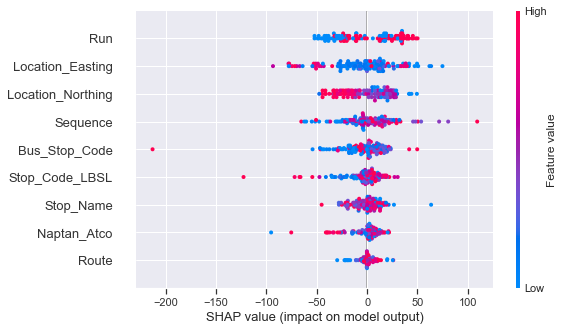

In [51]:
shap.summary_plot(shap_values, X_test)

In [20]:
df8

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,NaN,NaN,NaN
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,NaN,NaN,NaN
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,NaN,NaN,NaN
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,NaN,NaN,NaN
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
140,11_19/20,11,28,10-Jan-21,06-Feb-21,51.6,16.8,2.7,0.7,3.5,0.0,1.2
141,12_19/20,12,28,07-Feb-21,06-Mar-21,56.9,19.8,3.1,0.8,4.4,0.1,1.4
142,13_19/20,13,29,07-Mar-21,31-Mar-21,72.9,22.4,3.3,1.0,4.8,0.1,1.5
143,01_21/22,1,31,01-Apr-21,01-May-21,95.6,37.4,4.9,1.3,8.6,0.1,2.1


In [58]:
dscrb=df8.describe(include='all')
dscrb

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
count,145,145.000000,145.000000,145,145,145.000000,145.000000,145.000000,145.000000,138.000000,116.000000,79.000000
unique,132,NaN,NaN,145,145,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,09_19/20,NaN,NaN,10-Nov-19,23-Jul-16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,2,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,6.924138,28.103448,NaN,NaN,165.246897,91.438621,7.747586,2.092414,11.213768,0.109483,3.493671
std,NaN,3.784256,0.674168,NaN,NaN,35.613286,24.922224,2.014913,0.445827,3.713404,0.064577,1.071943
min,NaN,1.000000,26.000000,NaN,NaN,30.200000,5.700000,1.200000,0.400000,1.000000,0.000000,0.600000
25%,NaN,4.000000,28.000000,NaN,NaN,162.300000,88.800000,6.500000,2.000000,8.725000,0.100000,3.250000
50%,NaN,7.000000,28.000000,NaN,NaN,176.500000,97.500000,8.200000,2.200000,11.200000,0.100000,3.700000
75%,NaN,10.000000,28.000000,NaN,NaN,183.800000,106.000000,9.300000,2.400000,14.475000,0.100000,4.200000


In [59]:
df8.isna().sum()

Period and Financial year         0
Reporting Period                  0
Days in period                    0
Period beginning                  0
Period ending                     0
Bus journeys (m)                  0
Underground journeys (m)          0
DLR Journeys (m)                  0
Tram Journeys (m)                 0
Overground Journeys (m)           7
Emirates Airline Journeys (m)    29
TfL Rail Journeys (m)            66
dtype: int64

In [60]:
values={'Overground Journeys (m)':dscrb['Overground Journeys (m)']['mean'],
       'Emirates Airline Journeys (m)':dscrb['Emirates Airline Journeys (m)']['mean'],
       'TfL Rail Journeys (m)':dscrb['TfL Rail Journeys (m)']['mean']}

In [61]:
df8=df8.fillna(value=values)

In [62]:
df8

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,01_10/11,1,31,01-Apr-10,01-May-10,189.1,90.5,6.3,2.3,11.213768,0.109483,3.493671
1,02_10/11,2,28,02-May-10,29-May-10,181.6,84.5,5.8,2.2,11.213768,0.109483,3.493671
2,03_10/11,3,28,30-May-10,26-Jun-10,175.9,84.3,5.8,2.1,11.213768,0.109483,3.493671
3,04_10/11,4,28,27-Jun-10,24-Jul-10,183.4,86.5,6.1,2.1,11.213768,0.109483,3.493671
4,05_10/11,5,28,25-Jul-10,21-Aug-10,160.4,82.9,5.8,2.0,11.213768,0.109483,3.493671
...,...,...,...,...,...,...,...,...,...,...,...,...
140,11_19/20,11,28,10-Jan-21,06-Feb-21,51.6,16.8,2.7,0.7,3.500000,0.000000,1.200000
141,12_19/20,12,28,07-Feb-21,06-Mar-21,56.9,19.8,3.1,0.8,4.400000,0.100000,1.400000
142,13_19/20,13,29,07-Mar-21,31-Mar-21,72.9,22.4,3.3,1.0,4.800000,0.100000,1.500000
143,01_21/22,1,31,01-Apr-21,01-May-21,95.6,37.4,4.9,1.3,8.600000,0.100000,2.100000


In [71]:
df8['Period beginning']=df8['Period beginning'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))
df8['Period ending']=df8['Period ending'].apply(lambda x: datetime.strptime(x, '%d-%b-%y'))


TypeError: strptime() argument 1 must be str, not Timestamp

In [76]:
df8['Period and Financial year']=df8['Period and Financial year'].str[-2:]
df8['Period and Financial year']=df8['Period and Financial year'].apply(lambda x: datetime.strptime(x, '%y'))

In [77]:
df8

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m)
0,2011-01-01,1,31,2010-04-01,2010-05-01,189.1,90.5,6.3,2.3,11.213768,0.109483,3.493671
1,2011-01-01,2,28,2010-05-02,2010-05-29,181.6,84.5,5.8,2.2,11.213768,0.109483,3.493671
2,2011-01-01,3,28,2010-05-30,2010-06-26,175.9,84.3,5.8,2.1,11.213768,0.109483,3.493671
3,2011-01-01,4,28,2010-06-27,2010-07-24,183.4,86.5,6.1,2.1,11.213768,0.109483,3.493671
4,2011-01-01,5,28,2010-07-25,2010-08-21,160.4,82.9,5.8,2.0,11.213768,0.109483,3.493671
...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020-01-01,11,28,2021-01-10,2021-02-06,51.6,16.8,2.7,0.7,3.500000,0.000000,1.200000
141,2020-01-01,12,28,2021-02-07,2021-03-06,56.9,19.8,3.1,0.8,4.400000,0.100000,1.400000
142,2020-01-01,13,29,2021-03-07,2021-03-31,72.9,22.4,3.3,1.0,4.800000,0.100000,1.500000
143,2022-01-01,1,31,2021-04-01,2021-05-01,95.6,37.4,4.9,1.3,8.600000,0.100000,2.100000


In [80]:
df8['Total']=''

for i in df8.index:
    df8['Total'][i]=(df8['Bus journeys (m)'][i]+df8['Underground journeys (m)'][i]+
                     df8['DLR Journeys (m)'][i]+df8['Tram Journeys (m)'][i]+
                     df8['Overground Journeys (m)'][i]+df8['Emirates Airline Journeys (m)'][i]+
                     df8['TfL Rail Journeys (m)'][i])


In [81]:
df8

,Period and Financial year,Reporting Period,Days in period,Period beginning,Period ending,Bus journeys (m),Underground journeys (m),DLR Journeys (m),Tram Journeys (m),Overground Journeys (m),Emirates Airline Journeys (m),TfL Rail Journeys (m),Total
0,2011-01-01,1,31,2010-04-01,2010-05-01,189.1,90.5,6.3,2.3,11.213768,0.109483,3.493671,303.016922
1,2011-01-01,2,28,2010-05-02,2010-05-29,181.6,84.5,5.8,2.2,11.213768,0.109483,3.493671,288.916922
2,2011-01-01,3,28,2010-05-30,2010-06-26,175.9,84.3,5.8,2.1,11.213768,0.109483,3.493671,282.916922
3,2011-01-01,4,28,2010-06-27,2010-07-24,183.4,86.5,6.1,2.1,11.213768,0.109483,3.493671,292.916922
4,2011-01-01,5,28,2010-07-25,2010-08-21,160.4,82.9,5.8,2.0,11.213768,0.109483,3.493671,265.916922
...,...,...,...,...,...,...,...,...,...,...,...,...,...
140,2020-01-01,11,28,2021-01-10,2021-02-06,51.6,16.8,2.7,0.7,3.500000,0.000000,1.200000,76.5
141,2020-01-01,12,28,2021-02-07,2021-03-06,56.9,19.8,3.1,0.8,4.400000,0.100000,1.400000,86.5
142,2020-01-01,13,29,2021-03-07,2021-03-31,72.9,22.4,3.3,1.0,4.800000,0.100000,1.500000,106.0
143,2022-01-01,1,31,2021-04-01,2021-05-01,95.6,37.4,4.9,1.3,8.600000,0.100000,2.100000,150.0


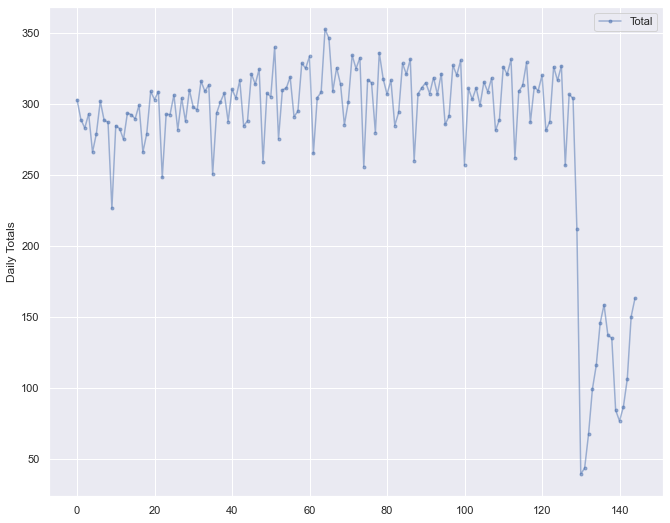

In [85]:
cols_plot = ['Total']
axes = df8[cols_plot].plot(marker='.', alpha=0.5, linestyle='-', figsize=(11, 9), subplots=True)
for ax in axes:
    ax.set_ylabel('Daily Totals')

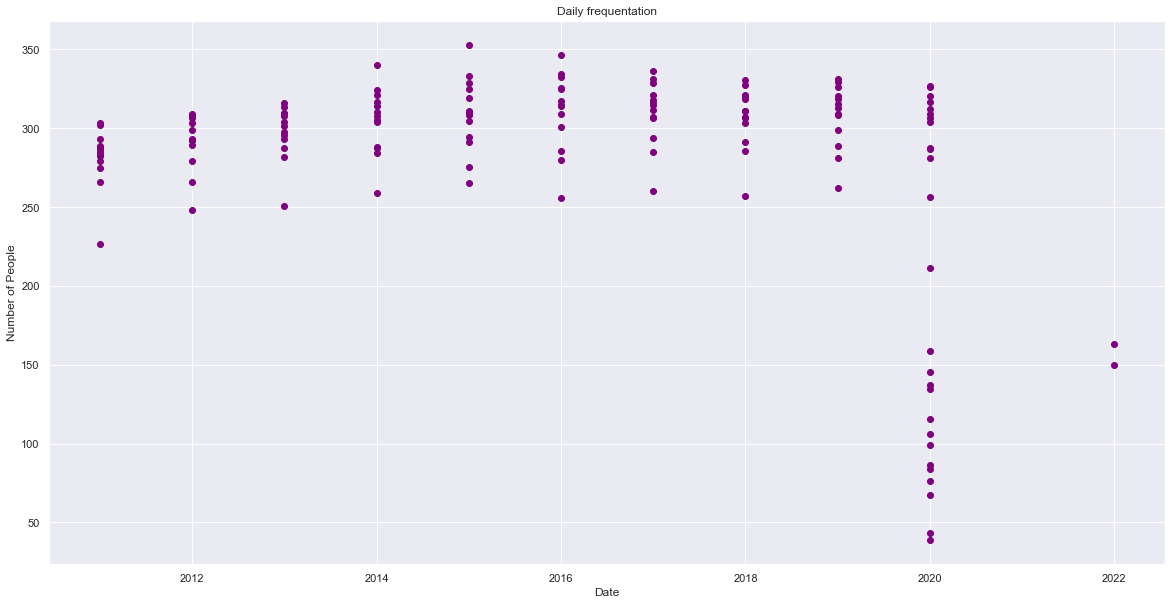

In [87]:

fig, ax = plt.subplots(figsize=(20, 10))

# Add x-axis and y-axis
ax.scatter(df8['Period and Financial year'], df8['Total'], color='purple')

# Set title and labels for axes
ax.set(xlabel="Date",
       ylabel="Number of People",
       title="Daily frequentation")

plt.show()

DataError: No numeric types to aggregate

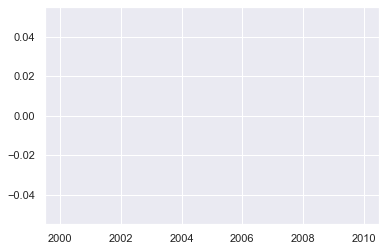

In [101]:
sns.lineplot(df8['Period beginning'], df8['Total'])
plt.show()

In [94]:
col=['Period and Financial year','Reporting Period','Days in period','Period beginning','Period ending']

In [95]:
def preprocess(dataset):
    X = pd.DataFrame()
    X = dataset[col]
    
    Y = dataset['Total']

    # Label encoding for categorical variables
    label_encoder = LabelEncoder()

    X['Period and Financial year'] = label_encoder.fit_transform(dataset['Period and Financial year'])
    X['Period beginning'] = label_encoder.fit_transform(dataset['Period beginning'])
    X['Period ending'] = label_encoder.fit_transform(dataset['Period ending'])
    


    return X, Y

In [96]:
processed_dataset = preprocess(df8)
processed_dataset
X_train, X_test, Y_train, Y_test = train_test_split(*processed_dataset, test_size=0.5, shuffle=True)

In [97]:
shap.initjs()
model = xgb.XGBRegressor()
model.fit(X_train, Y_train)
booster = model.get_booster()
model2 = booster.save_raw()[4:]
booster.save_raw = lambda: model2
explainer = shap.TreeExplainer(booster)
shap_values = explainer.shap_values(X_test, approximate=True)
index = 30
shap.force_plot(explainer.expected_value, shap_values[index,:], X_test.iloc[index,:])

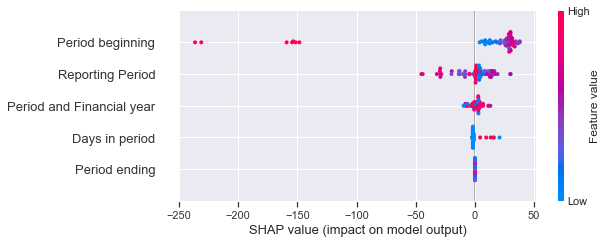

In [98]:
shap.summary_plot(shap_values, X_test)

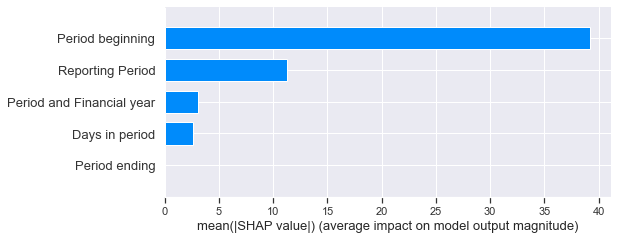

In [99]:
shap.summary_plot(shap_values, X_test, plot_type="bar")
